In [ ]:
import pandas as pd
import numpy as np

# Read a CSV file into a pandas dataframe
dataframe = pd.read_csv("CLS_train_data.csv")
print(dataframe)

# Split the dataframe into features array and label array
train_x = dataframe.drop("label", axis=1).values
train_y = dataframe["label"].values

# Save the arrays to .npy(numpy) files
np.save("CLS_train_x.npy", train_x)
np.save("CLS_train_y.npy", train_y)

# Read a CSV file into a pandas dataframe
dataframe = pd.read_csv("CLS_test_data.csv")
print(dataframe)

# Split the dataframe into feature and label arrays
test_x = dataframe.drop("label", axis=1).values
test_y = dataframe["label"].values

# Save the arrays to .npy files
np.save("CLS_test_x.npy", test_x)
np.save("CLS_test_y.npy", test_y)

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy as np

# Load the training data
train_x = np.load("CLS_train_x.npy")
train_y = np.load("CLS_train_y.npy")

# Load the test data
test_x = np.load("CLS_test_x.npy")
test_y = np.load("CLS_test_y.npy")

print(train_x)
print(train_y)

print(test_x)
print(test_y)

# One-hot encoding for the labels
train_y_encoded = to_categorical(train_y)
test_y_encoded = to_categorical(test_y)

print(train_y_encoded)
print(test_y_encoded)

[[1500    3    1]
 [2400    4    2]
 [1800    3    3]
 [2200    4    2]
 [1700    3    1]]
[0 1 0 2 0]
[[1100    2    1]
 [2200    3    1]]
[0 2]
[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[1. 0. 0.]
 [0. 0. 1.]]


In [3]:
# Create the model
model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(train_x.shape[1],)))
model.add(Dense(train_y_encoded.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [4]:
# Train the model
history = model.fit(train_x, train_y_encoded, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
1/1 [==============================] - 0s 326ms/step - loss: 341.4415 - accuracy: 0.2000
Epoch 2/10
1/1 [==============================] - 0s 8ms/step - loss: 327.2652 - accuracy: 0.2000
Epoch 3/10
1/1 [==============================] - 0s 6ms/step - loss: 313.1007 - accuracy: 0.2000
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 298.9483 - accuracy: 0.2000
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 284.8083 - accuracy: 0.2000
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 270.6808 - accuracy: 0.2000
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 256.5657 - accuracy: 0.2000
Epoch 8/10
1/1 [==============================] - 0s 11ms/step - loss: 242.4631 - accuracy: 0.2000
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 228.3730 - accuracy: 0.2000
Epoch 10/10
1/1 [==============================] - 0s 5ms/step - loss: 214.2955 - accuracy: 0.2000


dict_keys(['loss', 'accuracy'])


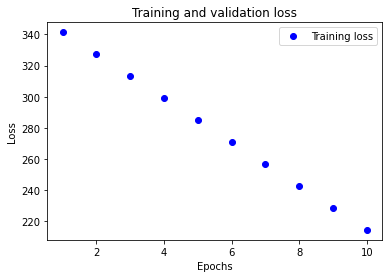

In [5]:
import matplotlib.pyplot as plt

print(history.history.keys())
loss = history.history['loss']
epochs = range(1, len(loss) + 1)

# bo = 파란색 점
plt.plot(epochs, loss, 'bo', label='Training loss') # plot x and y using blue circle markers
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [6]:
# Make predictions on the test data
predictions = model.predict(test_x)

print(predictions)

# Get the class with the highest probability
results = np.argmax(predictions, axis=1)

print(results)

1/1 [==============================] - 0s 69ms/step
[[0. 1. 0.]
 [0. 1. 0.]]
[1 1]


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

# Make predictions on the test data
predictions = model.predict(test_x)
print(predictions)

# Get the class with the highest probability
results = np.argmax(predictions, axis=1)

print(results)
print(test_y)

print(classification_report(test_y, results))

# Convert numpy array to python list
results_list = results.tolist()
test_y_list = test_y.tolist()

print(results)
print(test_y)

# Calculate the accuracy of the model
accuracy = accuracy_score(test_y_list, results_list)

# Calculate the precision of the model
precision = precision_score(test_y_list, results_list, average=None)

# Calculate the recall of the model
recall = recall_score(test_y_list, results_list, average=None)

# Calculate the F1 score of the model
f1 = f1_score(test_y_list, results_list, average=None)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

1/1 [==============================] - 0s 17ms/step
[[0. 1. 0.]
 [0. 1. 0.]]
[1 1]
[0 2]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

[1 1]
[0 2]
Accuracy: 0.0
Precision: [0. 0. 0.]
Recall: [0. 0. 0.]
F1 Score: [0. 0. 0.]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get the true labels and predicted labels
y_true = [1, 0, 1, 1, 0]
y_pred = [1, 0, 1, 0, 0]

print(y_true)
print(y_pred)

# Calculate the accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy: ", acc)

# Calculate the precision
prec = precision_score(y_true, y_pred)
print("Precision: ", prec)

# Calculate the recall
rec = recall_score(y_true, y_pred)
print("Recall: ", rec)

# Calculate the F1-score
f1 = f1_score(y_true, y_pred)
print("F1-score: ", f1)

from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

[1, 0, 1, 1, 0]
[1, 0, 1, 0, 0]
Accuracy:  0.8
Precision:  1.0
Recall:  0.6666666666666666
F1-score:  0.8
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5

